In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import os
import cv2


## Mask Detection - VGG16

In [2]:
categories=['train','test']
categories1=['without_mask','with_mask']

In [3]:
data1=[]
for category in categories1:
    path=os.path.join('dataset\mask_detection',category)
    label1=categories1.index(category)
    for file in os.listdir(path):
       img_path=os.path.join(path,file)
       img=cv2.imread(img_path)
       img=cv2.resize(img,(224,224))
       data1.append([img,label1])

In [4]:
import random
random.shuffle(data1)

In [5]:
x1=[]
y1=[]
for features1,label1 in data1:
    x1.append(features1)
    y1.append(label1)

    
x1=np.array(x1)
y1=np.array(y1)


x1=x1/255

x1[0]

array([[[0.18039216, 0.19607843, 0.18823529],
        [0.1372549 , 0.14901961, 0.14117647],
        [0.10196078, 0.10980392, 0.10980392],
        ...,
        [0.09803922, 0.1372549 , 0.16470588],
        [0.07058824, 0.10980392, 0.1372549 ],
        [0.08627451, 0.1254902 , 0.15686275]],

       [[0.13333333, 0.14509804, 0.1372549 ],
        [0.08627451, 0.10196078, 0.09411765],
        [0.12941176, 0.1372549 , 0.1372549 ],
        ...,
        [0.07058824, 0.10980392, 0.13333333],
        [0.10196078, 0.14117647, 0.16470588],
        [0.06666667, 0.10196078, 0.12941176]],

       [[0.09411765, 0.10588235, 0.09803922],
        [0.09411765, 0.10588235, 0.09803922],
        [0.13333333, 0.14117647, 0.14117647],
        ...,
        [0.05098039, 0.08627451, 0.10588235],
        [0.09411765, 0.1254902 , 0.15294118],
        [0.10980392, 0.14117647, 0.16862745]],

       ...,

       [[0.09803922, 0.08235294, 0.0627451 ],
        [0.09411765, 0.07843137, 0.05882353],
        [0.08627451, 0

In [6]:
from sklearn.model_selection  import train_test_split
x_train1_full,x_test1,y_train1_full,y_test1=train_test_split(x1,y1,test_size=0.2,random_state = 42)
x_train, x_valid = x_train1_full[:-70], x_train1_full[-70:]
y_train, y_valid = y_train1_full[:-70], y_train1_full[-70:]

In [7]:
x_train.shape
x_valid.shape
len(x_train)

282

In [8]:
datagen = ImageDataGenerator(
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [9]:
model=Sequential()
vgg=VGG16()
for layer in vgg.layers[:-1]:
    model.add(layer)
    
for layer in model.layers:
    layer.trainable=False

In [10]:
model.build(x_train.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [11]:
vgg1=VGG16()
vgg1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
from tensorflow.keras.layers import Dense
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1,
                              mode='min',
                              restore_best_weights = True)

In [15]:
model.fit(datagen.flow(x_train, y_train, batch_size=32),
         steps_per_epoch=len(x_train) // 32, epochs=20,
         validation_data=(x_valid,y_valid))

Epoch 1/20
8/8 [==============================] - 62s 8s/step - loss: 0.5791 - accuracy: 0.8160 - val_loss: 0.4263 - val_accuracy: 1.0000
Epoch 2/20
8/8 [==============================] - 64s 8s/step - loss: 0.3871 - accuracy: 0.9922 - val_loss: 0.2861 - val_accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 58s 7s/step - loss: 0.2669 - accuracy: 0.9960 - val_loss: 0.2060 - val_accuracy: 1.0000
Epoch 4/20
8/8 [==============================] - 96s 11s/step - loss: 0.2093 - accuracy: 0.9880 - val_loss: 0.1571 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 64s 8s/step - loss: 0.1581 - accuracy: 1.0000 - val_loss: 0.1184 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 60s 8s/step - loss: 0.1277 - accuracy: 1.0000 - val_loss: 0.0939 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 65s 8s/step - loss: 0.1048 - accuracy: 1.0000 - val_loss: 0.0945 - val_accuracy: 1.0000
Epoch 8/20
8/8 [=================

In [23]:
loss, acc = model.evaluate(x_test1, y_test1, verbose=2)
print("Trained model, accuracy: {:5.2f}%".format(100 * acc))

3/3 - 14s - loss: 0.0436 - accuracy: 0.9888
Trained model, accuracy: 98.88%


In [71]:
model.save("model.model")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x00000231608F8940>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x00000231608F8940>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x00000231608F8940>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Assets written to: model.model\assets


INFO:tensorflow:Assets written to: model.model\assets


## Masked Face Recognition VGG16 (VGGFace)

In [11]:
categories=['train','test']
data=[]
cate=[]
for category in categories:
    path=os.path.join('dataset',category)
    for file in os.listdir(path):
        if not file.startswith('.'):
            img_path=os.path.join(path,file)
            cate.append(file)
            label=cate.index(file)
            files=os.listdir(img_path)
            for i in files:
                p=os.path.join(img_path,i)
                img_path=os.path.join(path,file)
                #print(p)
                img=cv2.imread(p)
                img=cv2.resize(img,(224,224))
                data.append([img,label])

In [12]:
h=(int(len(cate)/2))
del cate[:h]
print(cate)
print(len(cate))

['adriana_lima', 'alex_lawther', 'amber_heard', 'ben_affleck', 'bill_gates', 'bobby_morley', 'chris_evans', 'cristiano_ronaldo', 'cukang', 'dwayne_johnson', 'elon_musk', 'emilia_clarke', 'grant_gustin', 'gwyneth_paltrow', 'jeremy_renner', 'jimmy_fallon', 'maisie_williams', 'markzuckerberg', 'mark_wahlberg', 'rihanna', 'tom_cruise', 'will_smith', 'zoe_saldana']
23


In [13]:
import random
random.shuffle(data)

In [14]:
x=[]
y=[]
for features,label in data:
    x.append(features)
    y.append(label)

In [15]:
x=np.array(x)
y=np.array(y)

x=x/255

In [16]:
from sklearn.model_selection  import train_test_split
x_train_full,x_test,y_train_full,y_test=train_test_split(x,y,test_size=0.2,random_state = 42)
x_train, x_valid = x_train_full[:-70], x_train_full[-70:]
y_train, y_valid = y_train_full[:-70], y_train_full[-70:]

In [11]:
x_train_full.shape

(183, 224, 224, 3)

In [9]:
datagen = ImageDataGenerator(
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [13]:
model_vgg16=Sequential()
vgg=VGG16()
for layer in vgg.layers[:-1]:
    model_vgg16.add(layer)

In [14]:
for layer in model_vgg16.layers:
    layer.trainable=False

In [15]:
from keras.layers import Dense
model_vgg16.add(Dense(len(cate),activation='softmax'))

In [16]:
model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [17]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

optimizer = optimizers.Adam(learning_rate=0.001)
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=1,
                              mode='min',
                              restore_best_weights = True)
model_vgg16.compile(optimizer=optimizer,
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [18]:
model_vgg16.fit(datagen.flow(x_train, y_train, batch_size=5),
         steps_per_epoch=len(x_train) // 5, epochs=100,
         batch_size = 32,
         validation_data=datagen.flow(x_valid,y_valid),
         callbacks=[earlyStopping])

Epoch 1/100
14/14 [==============================] - 30s 2s/step - loss: 4.7842 - accuracy: 0.0381 - val_loss: 4.1879 - val_accuracy: 0.0571
Epoch 2/100
14/14 [==============================] - 34s 2s/step - loss: 4.1205 - accuracy: 0.0381 - val_loss: 3.6655 - val_accuracy: 0.0571
Epoch 3/100
14/14 [==============================] - 36s 3s/step - loss: 3.6534 - accuracy: 0.0571 - val_loss: 3.4514 - val_accuracy: 0.0429
Epoch 4/100
14/14 [==============================] - 36s 3s/step - loss: 3.5587 - accuracy: 0.0571 - val_loss: 3.7849 - val_accuracy: 0.0571
Epoch 5/100
14/14 [==============================] - 39s 3s/step - loss: 3.2687 - accuracy: 0.1524 - val_loss: 3.1543 - val_accuracy: 0.0714
Epoch 6/100
14/14 [==============================] - 36s 3s/step - loss: 3.1303 - accuracy: 0.1429 - val_loss: 3.1053 - val_accuracy: 0.1286
Epoch 7/100
14/14 [==============================] - 34s 3s/step - loss: 3.0403 - accuracy: 0.0952 - val_loss: 3.1622 - val_accuracy: 0.1857
Epoch 8/100
1

## Masked Face Recognition MobileNet (MobileNet)

In [26]:
from tensorflow.keras.applications.mobilenet import MobileNet

In [27]:
mobilenet_model = MobileNet(weights = 'imagenet',
                           include_top=False,
                           input_shape=(224,224,3))
mobilenet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [28]:
for layer in mobilenet_model.layers:
    layer.trainable=False

In [29]:
def lw(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [30]:
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.models import Model
num_classes = 23
FC_Head = lw(mobilenet_model, num_classes)
mobilenet_model = Model(inputs = mobilenet_model.input, outputs = FC_Head)
mobilenet_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [31]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
                              verbose=1,
                              mode='min',
                              restore_best_weights = True)
mobilenet_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [32]:
mobilenet_model.fit(datagen.flow(x_train, y_train, batch_size=4),
         steps_per_epoch=len(x_train) // 4, epochs=100,
         validation_data=(x_valid,y_valid),
         callbacks=[earlyStopping])

Epoch 1/100
28/28 [==============================] - 9s 220ms/step - loss: 3.4391 - accuracy: 0.0917 - val_loss: 3.2593 - val_accuracy: 0.1000
Epoch 2/100
28/28 [==============================] - 5s 176ms/step - loss: 2.8405 - accuracy: 0.1560 - val_loss: 2.7703 - val_accuracy: 0.1714
Epoch 3/100
28/28 [==============================] - 5s 177ms/step - loss: 2.4430 - accuracy: 0.2477 - val_loss: 2.5191 - val_accuracy: 0.1429
Epoch 4/100
28/28 [==============================] - 5s 175ms/step - loss: 2.0446 - accuracy: 0.3578 - val_loss: 2.4730 - val_accuracy: 0.2143
Epoch 5/100
28/28 [==============================] - 5s 176ms/step - loss: 1.7850 - accuracy: 0.4587 - val_loss: 2.2933 - val_accuracy: 0.3000
Epoch 6/100
28/28 [==============================] - 5s 178ms/step - loss: 1.4695 - accuracy: 0.5046 - val_loss: 1.9060 - val_accuracy: 0.4000
Epoch 7/100
28/28 [==============================] - 5s 182ms/step - loss: 1.1717 - accuracy: 0.6147 - val_loss: 2.4592 - val_accuracy: 0.3286

2/2 - 1s - loss: 1.2592 - accuracy: 0.6957
Trained model, accuracy: 69.57%


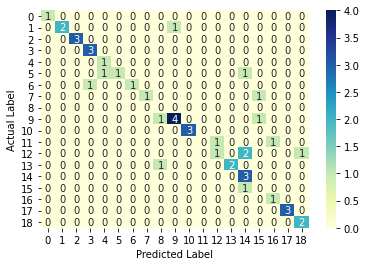

In [33]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
y_pred = mobilenet_model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
cnf_metric = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_metric),annot=True,cmap="YlGnBu",fmt="g")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

loss, acc = mobilenet_model.evaluate(x_test, y_test, verbose=2)
print("Trained model, accuracy: {:5.2f}%".format(100 * acc))

In [19]:
y_pred = mobilenet_model.predict(x_test[0])

NameError: name 'mobilenet_model' is not defined